In [2]:
import pandas as pd
from os import listdir
from obspy import read


# Read the file
The file with the first quality categorizations is called "quality_7.9_selection".



In [3]:
file = "quality_7.9_selection"

In [4]:
df = pd.read_pickle(file)

In [5]:
df.head()

,quality,noise
event_id,,
FGhXLK9X,2,NaN
ctpqppXn,4,NaN
jfVYQZvW,4,NaN
k5vKMzO1,5,NaN
m3eeDnSK,3,NaN


The type of quality is str. There are also some undefined values ("nan") which cannot be easily transformed into int or float. This creates problems for the astype method.

In [8]:
# problem here: still some NaN types
quality_df = df["quality"]
try:
    quality_df = quality_df.astype(int)
except Exception as ex:
    print(f"Error: {ex}")

Error: cannot convert float NaN to integer


## Modify NaN values
The dataframe contains empty or NaN values. These values cannot be processed and changed into an integer by pandas dataframe astype method. Therefore, the NaN values need to be changed into something else.

In [9]:
quality_df = df["quality"]

quality_df = quality_df.astype(str)

def apply_set_nan_0(value):
    if value == "nan":
        # print("hurray")
        value = 0
    value = int(value)
    return value
quality_df = quality_df.apply(apply_set_nan_0)
quality_df.head()

event_id
FGhXLK9X    2
ctpqppXn    4
jfVYQZvW    4
k5vKMzO1    5
m3eeDnSK    3
Name: quality, dtype: int64

## Visualization

<AxesSubplot:>

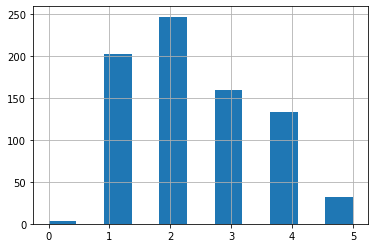

In [10]:
quality_df.hist(bins=11)

## Select only the events with quality above 3
Quality above 3 is usable. Filter out unnecessary events.

In [13]:
filtered_df = pd.DataFrame(quality_df)
filtered_df = filtered_df[filtered_df["quality"] >= 3]

Store the filtered dataframe.

In [70]:
filtered_df.to_pickle("filtered_events_q3_pickle")

# Displacement Values
Get the maximum displacement values from processing each file from the folder

In [14]:
folder = "example data"
files = listdir(folder)

In [15]:
def get_displacement(eventID):
    value = 0
    for search_file in files:
        if eventID in search_file:
            st = read(f"{folder}/{search_file}")
            tr = st[0]
            # delta = tr.stats.delta
            # pga, max_disp, max_vel, max_ =peak_ground_motion(tr, delta, 0.1)
                # Displacement
            data = tr
            if abs(max(data)) >= abs(min(data)):
                m_dis = abs(max(data))
            else:
                m_dis = abs(min(data))
            value = m_dis
    return value

Get the maximum displacement values for the filtered dataset (quality above 3).

In [16]:
disp_df = filtered_df.reset_index()["event_id"].apply(get_displacement)

In [17]:
get_every_disp = True
if get_every_disp:
    full_quality_df = pd.DataFrame(quality_df)
    every_disp = full_quality_df.reset_index()["event_id"].apply(get_displacement)

## Merge the dataframe with new values
The displacement values are created without an index in a series.
Attach the series to the "max_disp" column to the dataframe without an index.

In [35]:
# reset the full_quality_df frame
full_quality_df = pd.DataFrame(quality_df)
# reset the index
full_quality_df = full_quality_df.reset_index()
# attach
full_quality_df["max_disp"] = every_disp
# show
full_quality_df.head()

,event_id,quality,max_disp
0,FGhXLK9X,2,3.652426e-06
1,ctpqppXn,4,9.426302e-07
2,jfVYQZvW,4,6.177159e-07
3,k5vKMzO1,5,3.011066e-06
4,m3eeDnSK,3,3.412404e-07


Test some values of the stored frame with some event_ids and new lookups from the get_displacement function.

In [41]:
test_value1 = get_displacement("jfVYQZvW")
test_value2 = get_displacement("m3eeDnSK")
print(f"Value for jfVYQZvW should be: 6.177159e-07, actual value in frame {test_value1}")
print(f"Value for m3eeDnSK should be: 3.412404e-07, actual value in frame {test_value2}")

Value for jfVYQZvW should be: 6.177159e-07, actual value in frame 6.17715947902758e-07
Value for m3eeDnSK should be: 3.412404e-07, actual value in frame 3.4124037873258535e-07


## Filter only high quality values
High qualit is defined as quality level above 3.


In [43]:
high_quality_df = full_quality_df[full_quality_df["quality"] >= 3]

In [48]:
high_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 1 to 777
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   event_id  325 non-null    object 
 1   quality   325 non-null    int64  
 2   max_disp  325 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.2+ KB


## Load big dataset
The bigger Chile dataset contains more elements.

In [38]:
new_dataset_file = "bigger_dataset_chile"
big_df = pd.read_pickle(new_dataset_file)

In [50]:
big_df

,longitude,latitude,depth,time,mag,mag_type,m_rr,m_tt,m_pp,m_rt,...,source_time_duration,source_time_function,gcmt_id,m_rr_norm,m_tt_norm,m_pp_norm,m_rt_norm,m_rp_norm,m_tp_norm,event_id
105,-68.51,-20.54,133700.0,1976-11-30T00:41:13.300000Z,7.54,Mwc,-1.790000e+20,-3.500000e+19,2.140000e+20,5.500000e+19,...,30.2,box car,M113076A,-0.836449,-0.163551,1.000000,0.257009,-0.663551,-0.205607,QCvxzAzk
131,-68.61,-24.89,134400.0,1977-01-17T21:27:36.500000Z,6.85,Mwc,1.978000e+19,4.430000e+18,-2.422000e+19,3.270000e+18,...,20.4,box car,C011777C,0.816680,0.182907,-1.000000,0.135012,0.054913,-0.338976,SHZYFGYC
147,-62.91,-25.05,565100.0,1977-02-04T07:46:41.200000Z,6.65,Mwc,-1.800000e+18,-2.000000e+16,1.820000e+18,-5.630000e+18,...,6.0,box car,B020477A,-0.173077,-0.001923,0.175000,-0.541346,1.000000,0.108654,Kk5opeTY
220,-69.27,-23.01,129700.0,1977-04-15T23:35:40.000000Z,5.38,Mwc,-6.340000e+16,-6.600000e+16,1.294000e+17,-2.740000e+16,...,4.0,box car,B041577A,-0.489954,-0.510046,1.000000,-0.211747,-0.535549,-0.570325,EGJp1CDu
281,-69.71,-23.51,32000.0,1977-06-05T02:46:13.100000Z,5.87,Mwc,-1.055000e+17,-2.500000e+15,1.080000e+17,2.196000e+17,...,6.2,box car,B060577A,-0.148299,-0.003514,0.151813,0.308687,-1.000000,-0.465561,KHPJvRTa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,-66.67,-23.91,228900.0,2020-12-04T04:06:21.700000Z,5.21,Mwc,-7.900000e+16,5.800000e+15,7.320000e+16,5.100000e+15,...,2.0,triangle,C202012040406A,-1.000000,0.073418,0.926582,0.064557,-0.234177,0.334177,gnvIlm5o
56674,-69.07,-20.36,114000.0,2020-12-06T16:47:45.200000Z,6.11,Mwc,-1.030000e+18,-2.980000e+17,1.320000e+18,3.690000e+17,...,5.6,triangle,C202012061647A,-0.757353,-0.219118,0.970588,0.271324,-1.000000,-0.102941,0dmUAcxW
56722,-68.68,-21.83,119900.0,2020-12-14T15:20:53.700000Z,6.05,Mwc,-6.530000e+17,2.810000e+17,3.720000e+17,-1.600000e+16,...,5.2,triangle,C202012141520A,-0.567826,0.244348,0.323478,-0.013913,-1.000000,0.656522,XRpYxnnp
56753,-68.71,-22.66,120800.0,2020-12-20T23:36:09.100000Z,4.80,Mwc,-1.180000e+16,3.100000e+15,8.660000e+15,-6.870000e+15,...,1.2,triangle,C202012202336A,-0.746835,0.196203,0.548101,-0.434810,-1.000000,-0.052532,JVvRQoIt


## Merge both dataset
With an inner join (standard merging parameter of pd.merge function), the shared event_id column will be used as the merging indicator.

In [56]:
merged_df = pd.merge(full_quality_df, big_df)

In [57]:
merged_df.to_pickle("merged_base_frame")

In [58]:
merged_df

,event_id,quality,max_disp,longitude,latitude,depth,time,mag,mag_type,m_rr,...,m_tp,source_time_duration,source_time_function,gcmt_id,m_rr_norm,m_tt_norm,m_pp_norm,m_rt_norm,m_rp_norm,m_tp_norm
0,FGhXLK9X,2,3.652426e-06,-68.34,-21.62,141600.0,2020-01-14T01:57:32.800000Z,5.14,Mwc,-5.800000e+16,...,-3.670000e+16,1.8,triangle,C202001140157A,-1.000000,0.196552,0.803448,0.048448,-0.091034,-0.632759
1,ctpqppXn,4,9.426302e-07,-69.26,-19.61,123400.0,2020-08-03T11:56:54.100000Z,5.49,Mwc,-1.710000e+17,...,-1.720000e+16,2.8,triangle,C202008031156A,-0.909574,-0.092021,1.000000,0.109574,-0.590426,-0.091489
2,jfVYQZvW,4,6.177159e-07,-66.90,-24.20,218100.0,2007-04-18T01:08:15.600000Z,5.60,Mwc,-1.590000e+17,...,1.180000e+17,3.0,triangle,C200704180108A,-0.673729,-0.326695,1.000000,0.436441,-0.745763,0.500000
3,k5vKMzO1,5,3.011066e-06,-71.25,-19.84,33000.0,2014-03-24T11:32:19.900000Z,5.35,Mwc,1.090000e+17,...,1.640000e+16,2.4,triangle,C201403241132A,1.000000,-0.077982,-0.917431,0.155963,-0.744954,0.150459
4,m3eeDnSK,3,3.412404e-07,-70.71,-20.78,37900.0,2014-09-04T09:26:56.900000Z,5.01,Mwc,3.530000e+16,...,7.800000e+15,1.6,triangle,C201409040926A,0.980556,0.019722,-1.000000,0.257778,-0.511111,0.216667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,FACaPbei,2,4.486110e-06,-67.18,-24.21,196300.0,2019-12-15T18:42:13.100000Z,5.08,Mwc,-2.870000e+16,...,6.420000e+15,1.6,triangle,C201912151842A,-0.735897,-0.264103,1.000000,0.474359,-0.853846,0.164615
774,ML8hPE4r,4,3.706841e-06,-64.49,-23.14,13000.0,2004-03-22T04:23:04.900000Z,5.68,Mwc,1.010000e+17,...,1.630000e+17,3.4,triangle,C032204A,0.285311,0.087288,-0.372881,0.216102,1.000000,0.460452
775,vILfV3vf,2,7.593139e-07,-67.12,-24.30,192300.0,2019-04-21T16:31:47.000000Z,5.09,Mwc,-3.680000e+16,...,5.840000e+15,1.8,triangle,C201904211631A,-0.901961,-0.097059,1.000000,0.011765,-0.943627,0.143137
776,1Y6faC5v,3,2.402271e-06,-63.27,-28.19,565100.0,2012-03-05T07:46:12.000000Z,6.12,Mwc,-1.480000e+18,...,-5.340000e+17,5.6,triangle,C201203050746A,-1.000000,0.709459,0.286486,-0.756757,0.372297,-0.360811
